In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive


In [7]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Dataset/4K_House_Rent_Dataset.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [8]:
!pip install seaborn

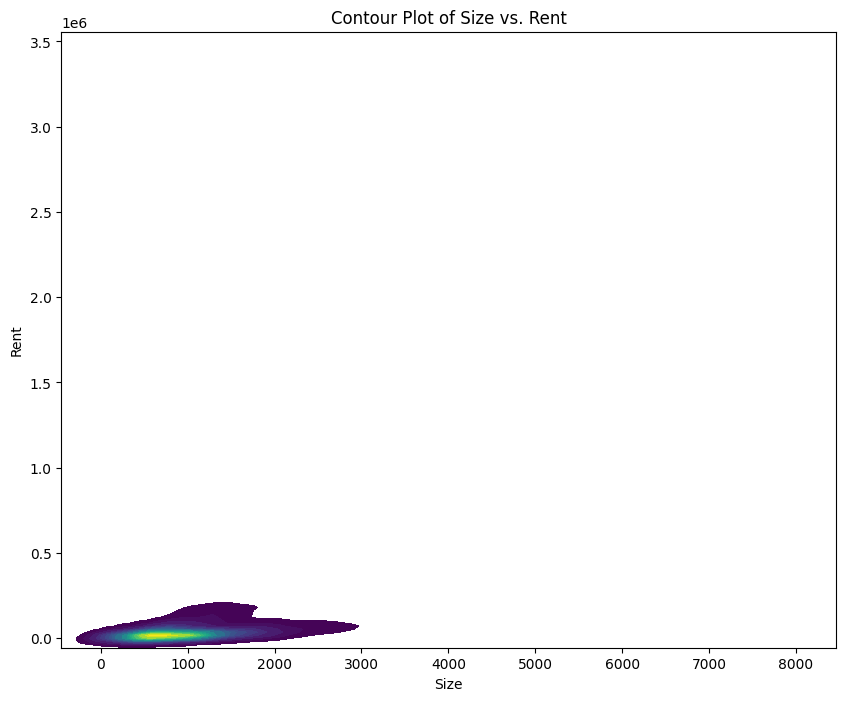

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the contour plot
plt.figure(figsize=(10, 8))
sns.kdeplot(x=data['Size'], y=data['Rent'], fill=True, cmap="viridis", levels=20)
plt.title('Contour Plot of Size vs. Rent')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()



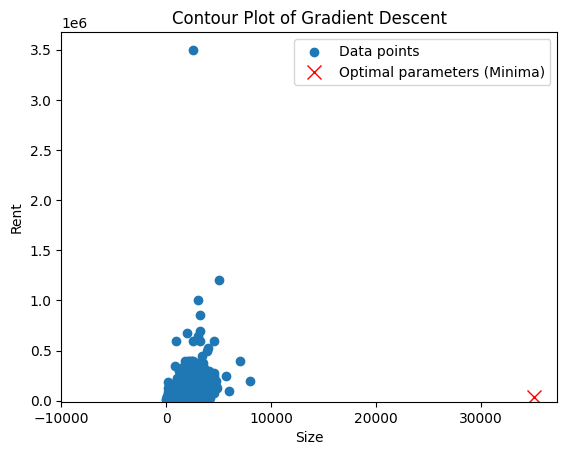

In [16]:
# Consider 'Size' as a feature and 'Rent' as the target variable
X = data['Size'].values
y = data['Rent'].values

# Normalize the features
X = (X - np.mean(X)) / np.std(X)

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
theta = np.zeros(2)

# Define the linear regression hypothesis
def hypothesis(theta, X):
    return np.dot(X, theta)

# Define the cost function
def cost_function(theta, X, y):
    m = len(y)
    error = hypothesis(theta, X) - y
    return (1/(2 * m)) * np.sum(error**2)

# Define the gradient descent function
def gradient_descent(theta, X, y, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        error = hypothesis(theta, X) - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost_history.append(cost_function(theta, X, y))

    return theta, cost_history

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Run gradient descent
theta, cost_history = gradient_descent(theta, X, y, alpha, iterations)

# Plot the contour plot
plt.scatter(data['Size'], data['Rent'], label='Data points')
plt.xlabel('Size')
plt.ylabel('Rent')

# Create a meshgrid for contour plot
theta0_vals = np.linspace(-10000, 10000, 100)
theta1_vals = np.linspace(-10000, 10000, 100)
theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros_like(theta0_mesh)

for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        theta_tmp = np.array([theta0_mesh[i, j], theta1_mesh[i, j]])
        J_vals[i, j] = cost_function(theta_tmp, X, y)

# Plot the contour plot
plt.contour(theta0_mesh, theta1_mesh, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'rx', markersize=10, label='Optimal parameters (Minima)')
plt.title('Contour Plot of Gradient Descent')
plt.legend()
plt.show()
